# 4.5. K-means. Практика

In [3]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
plt.rcParams['figure.figsize'] = 12, 8

In [5]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

In [7]:
X

array([[0.59945663, 0.24694133],
       [0.5173267 , 0.57255303],
       [0.55229185, 0.40567924],
       ...,
       [0.8384347 , 0.52906874],
       [0.84228843, 0.11517496],
       [0.91963613, 0.22592146]])

In [8]:
y

array([1, 1, 0, ..., 2, 2, 2])

/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6387/3050580986.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')


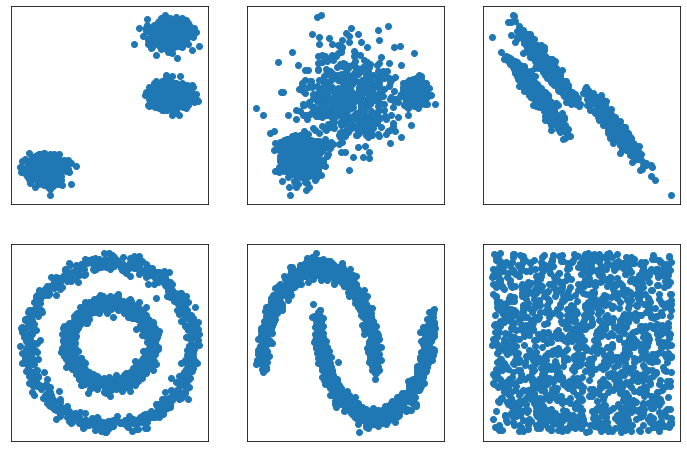

In [6]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

In [9]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6387/252996788.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6387/252996788.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6387/252996788.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6387/252996788.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and wi

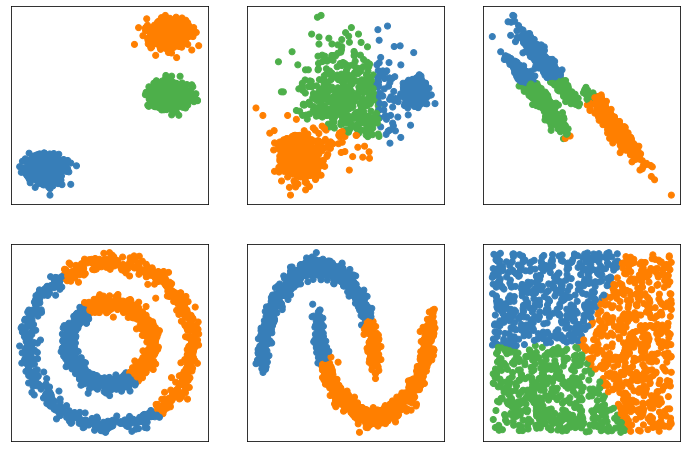

In [10]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

#Для наших задач создадим датасет, в котором будут три кластера, у каждого объекта будет два признака.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

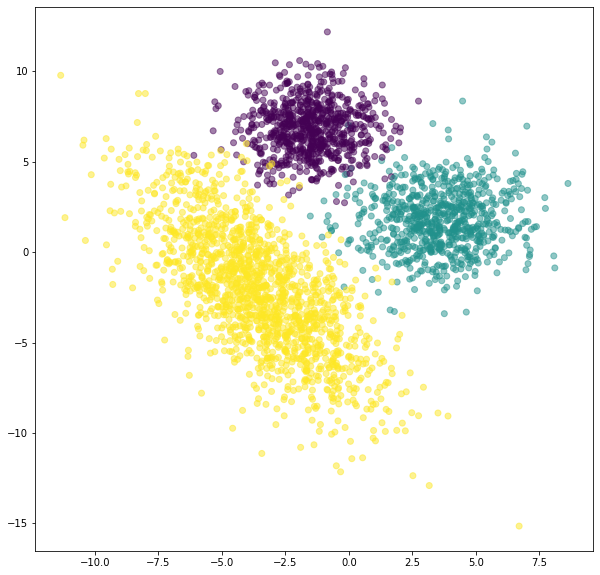

In [34]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [35]:
#Посмотрим распределение классов в датасете:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализируется так:

In [36]:
from sklearn.cluster import KMeans
k_means = KMeans()

При создании объекта можно указать следующие параметры:

n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
init — способ начальной инициализации центроидов кластеров;
random_state — фиксирует генерацию случайного числа для инициализации центроидов.

## Задание 4.5.1

2.0/2.0 points (graded)
При каком значении параметра init при создании объекта K-means центроиды классов будут инициализированы случайным образом в пространстве объектов датасета?

Для выполнения задания необходимо ознакомиться с документацией к реализации K-means в пакете scikit-learn.

init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
Method for initialization:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.



### ответ random

Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

k_means.fit(X)
Обучив, мы можем получить центроиды кластеров:

k_means.cluster_centers_
И узнать, в какой кластер попал каждый из объектов:

k_means.labels_
Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [45]:
def prepare_blobs():
    n_samples = 1500
    dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5), cluster_std=[1.4, 1.7], random_state=42)
    X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
    transformation = [[1.2, -0.8], [-0.4, 1.7]]
    X_2 = np.dot(X_2, transformation)
    X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
    return X, y

In [48]:
from sklearn.cluster import KMeans
import numpy as np
X, y = prepare_blobs()
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
#k_means.cluster_centers_
#k_means.labels_
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


### ответ [[-3 -3] [-2 6] [4 2]]

## Задание 4.5.3

2.0/2.0 points (graded)
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.



In [51]:
#Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:
import numpy as np
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')




1320 938 742 

###  ответ 1320 938 742 